# TensorFlow Knowledge Assessemnt

## Section 1: Basics of TensorFlow

### Question 1
Write a code snippet to import TensorFlow and check its version.

In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.1


 ---

 ### Question 2
Explain what a tensor is in TensorFlow and create a 2D tensor with the shape `(3, 4)` filled with random values.

**Tensors** are multi-dimensional arrays with a uniform type (called a dtype). You can see all supported dtypes at tf.dtypes.

All Tensors are immutable like python or string, where we can only update content of tensor by creating only a new one



In [4]:
# Create 2D Tensor with Shape (3,4)
tensor = tf.random.uniform(shape=(3,4)) # its a 2D tensor with 3 rows & 4 random values
print(tensor)

tf.Tensor(
[[0.5723262  0.6212909  0.05718946 0.3525275 ]
 [0.25450873 0.91745543 0.7691412  0.6319268 ]
 [0.42796445 0.7680893  0.09103906 0.23867023]], shape=(3, 4), dtype=float32)


---
## Section 2: Tensor Manipulations
### Question 3
Given a tensor with shape `(4, 5)` and values:
```
[[1, 2, 3, 4, 5],
[6, 7, 8, 9, 10],
[11, 12, 13, 14, 15],
[16, 17, 18, 19, 20]]
```
write a code snippet to:
- Reshape it into `(2, 10)`
- Extract the first row of the reshaped tensor.

In [5]:
# Given Tensor
tensor = tf.constant([[1, 2, 3, 4, 5],
          [6, 7, 8, 9, 10],
          [11, 12, 13, 14, 15],
          [16, 17, 18, 19, 20]])

# Reshape the Original Tensor into 2, 10
reshaped_tensor = tf.reshape(tensor, (2, 10))

# Extract the first row of the reshaped tensor
first_row = reshaped_tensor[0]

# Print Output
print("\nOriginal Tensor:\n ",tensor)
print("\nReshaped Tensor:\n ",reshaped_tensor)
print("\nFirst Row of the Reshaped Tensor:\n ",first_row)


Original Tensor:
  tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]], shape=(4, 5), dtype=int32)

Reshaped Tensor:
  tf.Tensor(
[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]], shape=(2, 10), dtype=int32)

First Row of the Reshaped Tensor:
  tf.Tensor([ 1  2  3  4  5  6  7  8  9 10], shape=(10,), dtype=int32)


---

## Section 3: Image Classification Task

### Question 4: Image Classification Using TensorFlow
Use TensorFlow to build an image classification model. Perform the following steps:

1. **Dataset**: Use the `Fashion MNIST` dataset available in TensorFlow.
2. **Model**: Build a Convolutional Neural Network (CNN) with at least one convolutional layer, one pooling layer, and one dense layer.
3. **Training**: Train the model with appropriate hyperparameters.
4. **Evaluation**: Evaluate the model on the test dataset and print the accuracy.
5. **Prediction**: Make predictions for a few test samples and display the images alongside their predicted labels.


In [6]:
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf

# Check for GPU availability
gpu_available = tf.config.list_physical_devices('GPU')
print("GPU Available:", len(gpu_available) > 0)


GPU Available: True


In [8]:
# Load Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist  # load data from dataset folder from Keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # Sp

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
# Define Class Name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Understanding Dataset

In [11]:
train_images.shape

(60000, 28, 28)

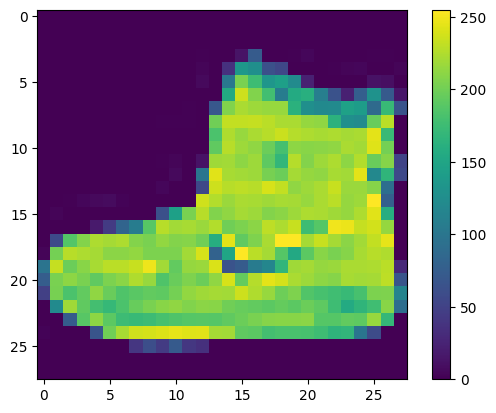

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_labels.shape  # 1D

(60000,)

Data Preprocessing

In [14]:
# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add channel dimension
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

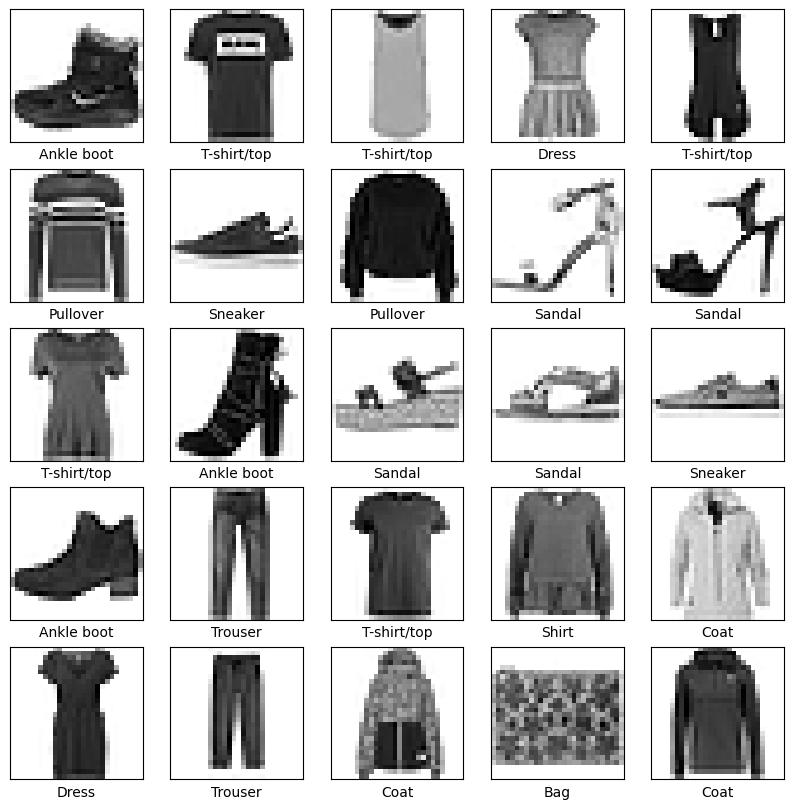

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build CNN Model

Build a Convolutional Neural Network (CNN) with at least one convolutional layer, one pooling layer, and one dense layer.

In [16]:
# Necessary Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

import warnings as wr
wr.filterwarnings('ignore')

In [17]:
# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Filter (3, 3)
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Add Flatten layer to convert 2D feature maps to 1D feature vectors
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes in Fashion MNIST
])

# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_images,
    train_labels,
    epochs=15,
    validation_data=(test_images, test_labels)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8203 - loss: 0.5168 - val_accuracy: 0.8783 - val_loss: 0.3322
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9032 - loss: 0.2672 - val_accuracy: 0.8912 - val_loss: 0.3059
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9167 - loss: 0.2262 - val_accuracy: 0.9101 - val_loss: 0.2472
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9322 - loss: 0.1857 - val_accuracy: 0.9093 - val_loss: 0.2651
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9410 - loss: 0.1575 - val_accuracy: 0.9111 - val_loss: 0.2578
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9498 - loss: 0.1336 - val_accuracy: 0.9122 - val_loss: 0.2656
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9604 - loss: 0.1111 - val_accuracy: 0.9127 - val_loss: 0.2753
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9642 - loss: 0.0945 - 

### Visualization

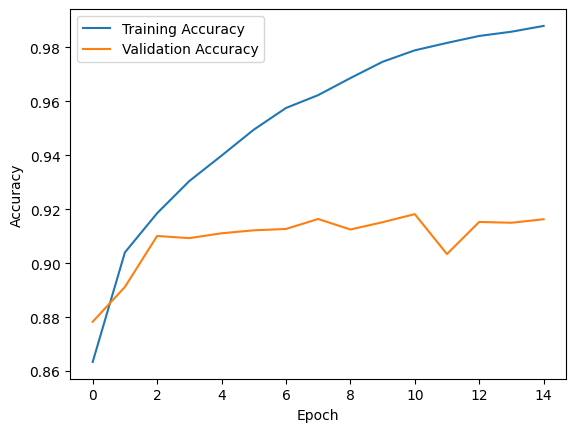

In [26]:
# Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Hyperparater Tunning

**Hyperparameter tuning** is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine. The goal of hyperparameter tuning is to find the values that lead to the best performance on a given task.

**Findings**
- 1. `Increase Number of Filters:`In the given project initial test accuracy was 88% (32 node & 5 epochs), to improve the accuracy level I have increased number of filters size from 32 to 64 nuerons with 20 epochs, hence found little improvement in test accuracy, that expericed and adjusted in training process

## Prediction

In [27]:
# Make predictions
predictions = model.predict(test_images)

# Visualization function
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {predicted_label} ({100 * np.max(predictions_array):.2f}%)\nTrue: {true_label}",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    bars = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


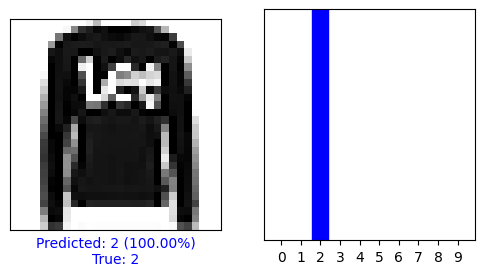

In [28]:
# Verify predictions for the first sample
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

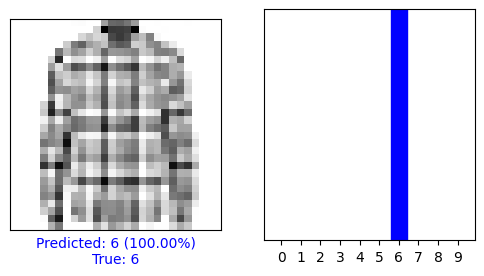

In [34]:
# Verify predictions for the first sample
i = 7
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)  # Ensure predictions[i] and y_test[i] are passed correctly
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

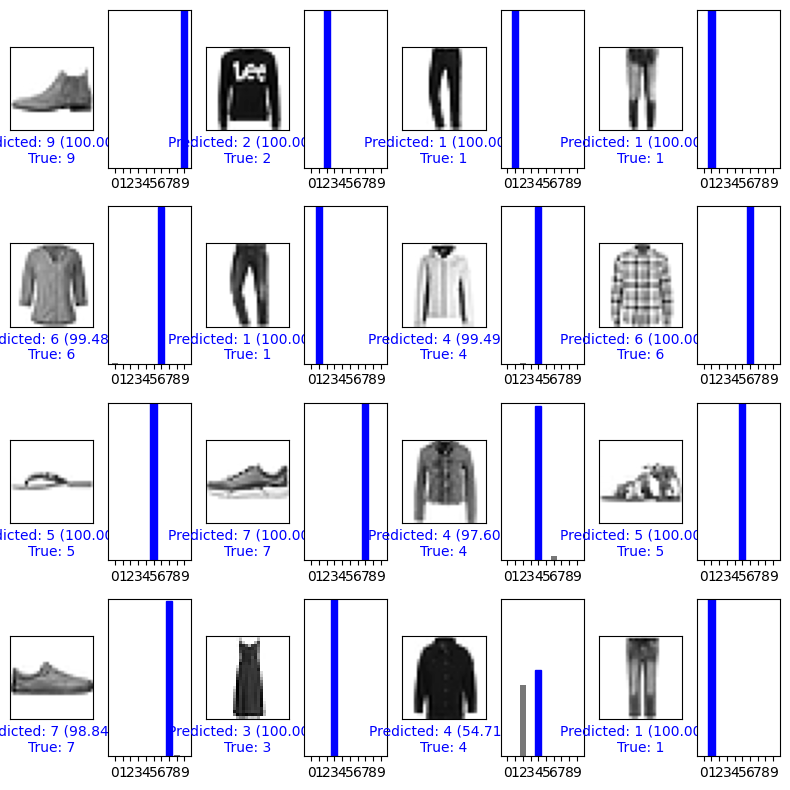

In [42]:
# Display a few predictions with their images
num_rows, num_cols = 4, 4
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()